In [1]:
from fastbook import *
from fastai.vision.widgets import *

In [2]:
key = '44cc57520b4b4116aa3ea2d064cc7338'

In [3]:
dog_types = 'golden retriever', 'shiba dog', 'bulldog', 'german shepherd', 'beagles'
path = Path('dog')

In [4]:
if not path.exists():
    path.mkdir()
    for d in dog_types:
        dest = (path/d)
        dest.mkdir(exist_ok=True)
        result = search_images_bing(key, f'{d}')
        download_images(dest, urls=result.attrgot('content_url'))

In [5]:
image_list = get_image_files(path)
image_list

(#745) [Path('dog/beagles/00000000.jpg'),Path('dog/beagles/00000001.jpg'),Path('dog/beagles/00000002.jpg'),Path('dog/beagles/00000003.jpg'),Path('dog/beagles/00000004.jpg'),Path('dog/beagles/00000005.jpg'),Path('dog/beagles/00000006.jpg'),Path('dog/beagles/00000007.jpg'),Path('dog/beagles/00000008.jpg'),Path('dog/beagles/00000009.jpg')...]

In [6]:
failed = verify_images(image_list)
failed

(#0) []

In [7]:
failed.map(Path.unlink)

(#0) []

In [8]:
dog = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter = RandomSplitter(valid_pct=0.3, seed=42),
    get_y = parent_label,
    item_tfms = Resize(128))

In [9]:
dls = dog.dataloaders(path)

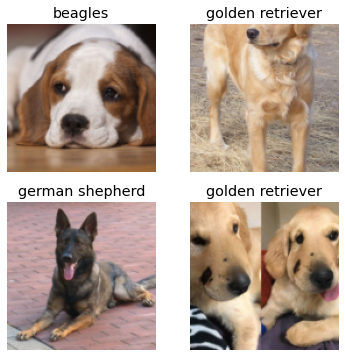

In [10]:
dls.valid.show_batch(max_n=4, nrows=2)

In [11]:
#dog = dog.new(
    #item_tfms=RandomResizedCrop(224, min_scale=0.5),
    #batch_tfms=aug_transforms())
#dls = dog.dataloaders(path)

In [12]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.862809,0.391270,0.147982,00:05


/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.485242,0.166953,0.062780,00:05
1,0.359288,0.170531,0.076233,00:05
2,0.256787,0.191509,0.071749,00:05
3,0.194069,0.204574,0.067265,00:05


/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


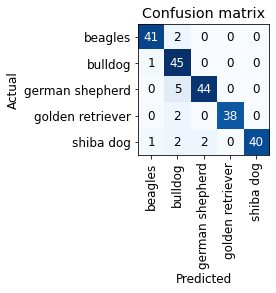

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

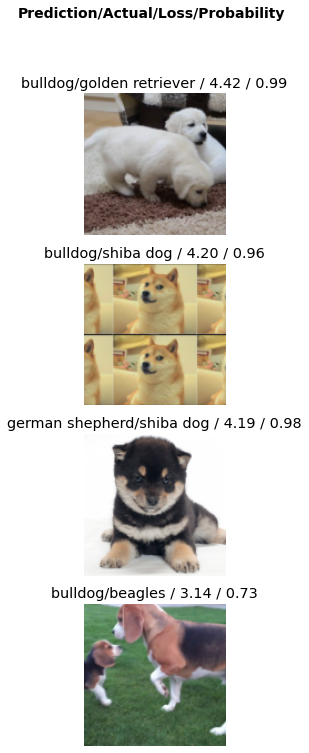

In [14]:
interp.plot_top_losses(4, nrows=4)

In [15]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [16]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [17]:
learn.export()

In [18]:
learn_inf = load_learner('export.pkl')

In [19]:
show_upload = widgets.Output()
prediction_result = widgets.Label()

In [20]:
upload_button = widgets.FileUpload()

In [21]:
classify_button = widgets.Button(description='Classify')

In [22]:
def on_click_classify(change):
    image = PILImage.create(upload_button.data[-1])
    show_upload.clear_output()
    with show_upload: display(image.to_thumb(128,128))
    prediction, index, proba = learn_inf.predict(image)
    prediction_result.value = f'Prediction: {prediction}; Probability: {proba[index]:.04f}'

classify_button.on_click(on_click_classify)

In [23]:
VBox([widgets.Label('Select a picture of a golden retriever / shiba / bulldog / german shepherd / beagles .'),
      upload_button, classify_button, show_upload, prediction_result])